In [ ]:
!pip install PyDrive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import time
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import os
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import zipfile
import math
from torch import nn
import torch.optim as optim
from torchvision import datasets, transforms
import shutil

if torch.cuda.is_available():
  torch.backends.cudnn.deterministic = True

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')
!unzip "/content/gdrive/MyDrive/content/Malware.zip" -d "/content/malware-images"

Streaming output truncated to the last 5000 lines.
  inflating: /content/malware-images/Malimg_Dataset/Allaple.L/0651671ce760ffbee5e9433b80724f2f.png  
  inflating: /content/malware-images/Malimg_Dataset/Allaple.L/06524ebf396548004410f99a4dde2e54.png  
  inflating: /content/malware-images/Malimg_Dataset/Allaple.L/06524f125eece7a54370609287188980.png  
  inflating: /content/malware-images/Malimg_Dataset/Allaple.L/0652f1f4bad2c5c928080bc90db86ed1.png  
  inflating: /content/malware-images/Malimg_Dataset/Allaple.L/0654748b4cc3330deef95ab0af4041cf.png  
  inflating: /content/malware-images/Malimg_Dataset/Allaple.L/06549b73968ac1fc1e8eb54dddb10833.png  
  inflating: /content/malware-images/Malimg_Dataset/Allaple.L/065513aa17b61f57cf793703a725c015.png  
  inflating: /content/malware-images/Malimg_Dataset/Allaple.L/06583d83c5278fac7cd20c015780c1d0.png  
  inflating: /content/malware-images/Malimg_Dataset/Allaple.L/0658876855197e86e417ba8a84d298ec.png  
  inflating: /content/malware-images/Mal

In [ ]:
#HYPERPARAMETERS

batch_size = 32
num_epochs = 5

In [ ]:
transformer=transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
])

In [ ]:
dataset_path = '/content/malware-images/Malimg_Dataset/'

def load_dataset():
    train_dataset_manual = torchvision.datasets.ImageFolder(dataset_path, transform=transformer)
    train_loader_manual = torch.utils.data.DataLoader(train_dataset_manual)
    return train_loader_manual


full_dataset = load_dataset()


train_size = int(0.6 * len(full_dataset))
test_size = int (0.2 * len(full_dataset))
valid_size = len(full_dataset) - train_size - test_size


train_dataset, test_dataset, valid_dataset = torch.utils.data.random_split(full_dataset.dataset, [train_size, test_size, valid_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=0, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=0, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, num_workers=0, shuffle=True)

print('Full Dataset - ' + str(len(full_dataset)) + ' images.')
print('Train Set- ' + str(train_size) + ' images in ' + str(len(train_loader)) +' batches')
print('Testing Set - ' + str(test_size) + ' images in ' + str(len(test_loader)) + ' batches' )
print('Validation Set - ' + str(valid_size) + ' images in ' + str(len(valid_loader)) + ' batches')

train_count = train_size
test_count = test_size
valid_count = valid_size

Full Dataset - 9339 images.
Train Set- 5603 images in 176 batches
Testing Set - 1867 images in 59 batches
Validation Set - 1869 images in 59 batches


In [ ]:
print(test_loader)

In [ ]:
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([32, 3, 256, 256])
Image label dimensions: torch.Size([32])


In [ ]:
root = pathlib.Path (dataset_path)
classes = sorted ([j.name.split('/')[-1] for j in root.iterdir()])
print (classes)
print(len(classes))

['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A']
25


In [ ]:
!pip install efficientnet_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16444 sha256=29b9e16b3c03e0705fa7508571268e0ffba61e227406c01db89e3c9103318339
  Stored in directory: /root/.cache/pip/wheels/29/16/24/752e89d88d333af39a288421e64d613b5f652918e39ef1f8e3
Successfully built efficientnet_pytorch


In [ ]:
device = torch.device ("cuda" if torch.cuda.is_available() else "cpu")
from efficientnet_pytorch import EfficientNet
model = EfficientNet.from_pretrained('efficientnet-b0').to(device)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth


  0%|          | 0.00/20.4M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b0


In [ ]:
import tensorflow as tf
checkpoint_path = "/content/drive/MyDrive/content/EfficientNet/Malware_20Epochs"

cp_callback = tf.keras.callbacks.ModelCheckpoint(
   checkpoint_path, verbose=1, save_weights_only=True,
   # Save weights, every epoch.
   save_freq='epoch')

In [ ]:
optimizer=Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()

In [ ]:
optimizer=Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()

In [ ]:
for epoch in range(num_epochs):
    
    #Evaluation and training on training dataset
    model.train()

    train_accuracy=0.0
    train_loss=0.0
    
    for i, (images,labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
            
        optimizer.zero_grad()
        
        outputs=model(images)
        
        loss=loss_function(outputs,labels)
        loss.backward()
        optimizer.step()
        
        
        #train_loss+= loss.cpu().data*images.size(0)
        train_loss+= loss.cpu().item()                #CPU  ???
        _,prediction=torch.max(outputs.data,1)
        
        train_accuracy+=int(torch.sum(prediction==labels.data))
        
    train_accuracy=train_accuracy/train_count
    train_loss=train_loss/train_count
    
    
    
    # Evaluation on testing dataset
    model.eval()
    
    valid_accuracy=0.0
    valid_loss = 0.0

    for i, (images,labels) in enumerate(test_loader):
        if torch.cuda.is_available():
          images=Variable(images.cuda())
          labels=Variable(labels.cuda())
            
        outputs=model(images)

        loss=loss_function(outputs,labels)
        _,prediction=torch.max(outputs.data,1)
        valid_accuracy+=int(torch.sum(prediction==labels.data))
        #test_loss+= loss.cpu().data*images.size(0)
        valid_loss+= loss.item()
        
        
    valid_accuracy=valid_accuracy/test_count
    valid_loss=valid_loss/test_count
        
        
    print('Epoch: %d Train Loss: %.5f Train Accuracy: %.5f Validation Loss: %.5f  Validation Accuracy: %.5f' % (epoch, train_loss, train_accuracy, valid_loss, valid_accuracy))

Epoch: 0 Train Loss: 0.00225 Train Accuracy: 0.98697 Validation Loss: 0.00237  Validation Accuracy: 0.98393
Epoch: 1 Train Loss: 0.00193 Train Accuracy: 0.98697 Validation Loss: 0.00355  Validation Accuracy: 0.97001
Epoch: 2 Train Loss: 0.00115 Train Accuracy: 0.98893 Validation Loss: 0.00202  Validation Accuracy: 0.98286
Epoch: 3 Train Loss: 0.00051 Train Accuracy: 0.99607 Validation Loss: 0.00304  Validation Accuracy: 0.98607
Epoch: 4 Train Loss: 0.00055 Train Accuracy: 0.99500 Validation Loss: 0.00226  Validation Accuracy: 0.98286


In [ ]:
torch.save(model.state_dict(),'/content/drive/MyDrive/content/EfficientNet/Malware_25Epochs')

In [ ]:
path='/content/drive/MyDrive/content/EfficientNet/Malware_25Epochs'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
model.eval()

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False
    

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

images, labels = images.to(device), labels.to(device)

In [ ]:
y_pred = []
y_true = []

# iterate over test data
#for inputs, labels in test_loader:
for i, (images, labels) in enumerate(test_loader):
    images, labels = images.to(device), labels.to(device)

    output = model(images) # Feed Network

    output = (torch.max(torch.exp(output), 1)[1])
    output = output.data.cpu().numpy()

    y_pred.extend(output) # Save Prediction
        
    labels1 = labels.data.cpu().numpy()
    y_true.extend(labels1) # Save Trut

In [ ]:
print (len(y_pred))
print (len(y_true))
print(y_pred)
print(y_true)

1867
1867
[21, 2, 2, 24, 18, 2, 3, 2, 2, 3, 20, 24, 19, 2, 11, 22, 3, 11, 2, 2, 8, 13, 3, 12, 14, 18, 1, 2, 2, 2, 4, 2, 13, 24, 11, 2, 13, 24, 21, 3, 24, 24, 24, 18, 23, 3, 2, 2, 8, 3, 16, 8, 6, 16, 24, 2, 2, 16, 3, 23, 3, 10, 24, 2, 10, 2, 3, 2, 3, 11, 11, 2, 13, 23, 21, 2, 3, 3, 2, 3, 12, 6, 10, 5, 23, 11, 7, 21, 10, 3, 3, 2, 2, 11, 10, 9, 11, 23, 2, 2, 24, 2, 2, 2, 24, 3, 2, 0, 2, 13, 13, 3, 3, 2, 2, 2, 13, 4, 3, 3, 3, 10, 22, 10, 3, 2, 10, 22, 14, 3, 22, 24, 5, 15, 3, 10, 2, 20, 2, 3, 3, 2, 10, 22, 2, 24, 2, 3, 2, 4, 19, 12, 3, 12, 7, 2, 3, 2, 24, 2, 0, 22, 2, 2, 2, 2, 3, 2, 11, 15, 11, 2, 13, 2, 2, 2, 2, 10, 3, 13, 3, 2, 2, 19, 21, 11, 2, 3, 12, 2, 9, 13, 21, 13, 24, 2, 21, 6, 2, 2, 24, 2, 22, 3, 20, 2, 3, 2, 3, 2, 2, 2, 2, 1, 3, 2, 3, 2, 2, 11, 3, 3, 6, 11, 2, 24, 2, 3, 24, 11, 10, 2, 11, 10, 21, 2, 23, 3, 2, 24, 8, 3, 2, 3, 3, 10, 0, 3, 10, 0, 9, 23, 3, 22, 3, 9, 22, 3, 5, 12, 2, 2, 2, 2, 10, 1, 2, 4, 2, 22, 3, 7, 2, 2, 4, 5, 2, 11, 22, 2, 8, 24, 7, 6, 2, 4, 10, 23, 24, 2, 16, 2

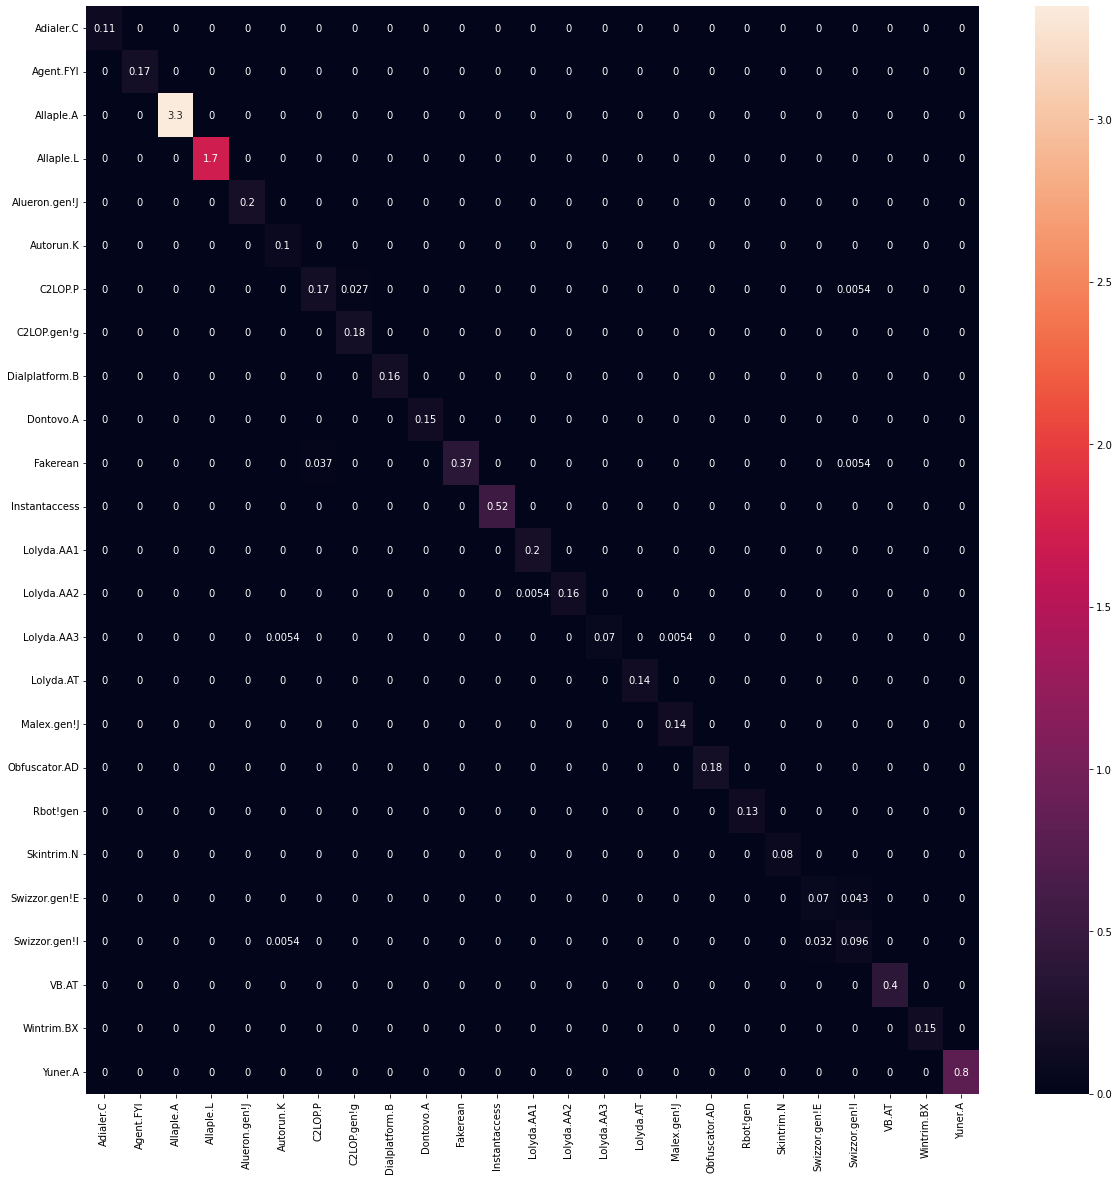

In [ ]:
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (20,20))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')